<h2> Prerequisite </h2>
- pip install torch    

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
df = pd.read_csv("/Users/keremsmacbook/DataspellProjects/MultivariateForecasting/Data/SP500_Cleaned.csv")

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df.shape

(2764, 461)

In [6]:
df.head(10)

,Unnamed: 0,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0,27.283405,13.179525,16.769093,22.419830,26.000973,14.793333,56.624992,38.340000,34.286098,...,19.033312,95.529976,19.385836,56.165749,37.213242,23.749273,39.127857,60.207806,40.959999,17.587208
2013-01-03,1,27.381128,12.877850,16.557428,22.234699,26.990719,14.750000,56.419998,37.750000,33.732830,...,19.033312,96.557526,19.329191,56.064457,37.112217,23.671537,39.372551,61.070477,41.000000,17.611206
2013-01-04,2,27.921843,13.886581,16.096222,21.953815,26.828459,14.876667,56.731575,38.130001,33.132832,...,19.190020,97.722618,19.400000,56.324043,37.433651,23.637007,39.803684,61.381714,40.669998,18.115057
2013-01-07,3,27.719885,13.990280,16.001547,21.998503,27.047497,14.730000,56.485600,37.939999,33.234123,...,19.248785,98.054352,19.194668,55.671913,37.562252,23.326099,39.553158,61.532909,40.900002,18.027084
2013-01-08,4,27.498386,14.291961,16.044611,21.519714,27.055613,14.750000,56.813564,38.139999,32.891258,...,19.379377,97.973450,19.230074,56.020145,37.130569,23.041113,37.892735,61.621864,40.930000,17.667183
2013-01-09,5,28.241058,14.263677,15.793853,21.641014,27.234089,14.803333,57.215347,38.660000,32.805550,...,19.823374,98.321350,19.258394,55.804855,37.112217,23.403828,37.960068,62.760197,41.369999,17.475239
2013-01-10,6,28.449533,14.273106,15.989633,21.704851,27.461245,14.836667,56.715172,38.619999,33.202961,...,19.940905,99.437920,19.258394,56.412678,37.038750,23.731987,38.797516,62.884705,41.150002,17.555218
2013-01-11,7,28.293179,13.933719,15.891588,21.866341,27.184271,14.926667,57.297321,38.090000,32.930241,...,20.110674,99.510735,19.237150,56.735592,36.671391,23.472908,39.160606,63.293781,41.299999,17.395258
2013-01-14,8,28.364840,13.830017,15.325013,22.021378,27.176128,15.026667,57.280918,38.160000,32.914646,...,20.110674,99.356995,19.173429,56.716572,36.561184,23.498819,38.738945,63.187073,40.980000,17.483234


In [7]:
df.drop("Unnamed: 0", inplace = True, axis=1)

In [8]:
df.head(10)

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,27.283405,13.179525,16.769093,22.419830,26.000973,14.793333,56.624992,38.340000,34.286098,21.421146,...,19.033312,95.529976,19.385836,56.165749,37.213242,23.749273,39.127857,60.207806,40.959999,17.587208
2013-01-03,27.381128,12.877850,16.557428,22.234699,26.990719,14.750000,56.419998,37.750000,33.732830,21.249302,...,19.033312,96.557526,19.329191,56.064457,37.112217,23.671537,39.372551,61.070477,41.000000,17.611206
2013-01-04,27.921843,13.886581,16.096222,21.953815,26.828459,14.876667,56.731575,38.130001,33.132832,21.832092,...,19.190020,97.722618,19.400000,56.324043,37.433651,23.637007,39.803684,61.381714,40.669998,18.115057
2013-01-07,27.719885,13.990280,16.001547,21.998503,27.047497,14.730000,56.485600,37.939999,33.234123,20.928026,...,19.248785,98.054352,19.194668,55.671913,37.562252,23.326099,39.553158,61.532909,40.900002,18.027084
2013-01-08,27.498386,14.291961,16.044611,21.519714,27.055613,14.750000,56.813564,38.139999,32.891258,21.174585,...,19.379377,97.973450,19.230074,56.020145,37.130569,23.041113,37.892735,61.621864,40.930000,17.667183
2013-01-09,28.241058,14.263677,15.793853,21.641014,27.234089,14.803333,57.215347,38.660000,32.805550,21.279190,...,19.823374,98.321350,19.258394,55.804855,37.112217,23.403828,37.960068,62.760197,41.369999,17.475239
2013-01-10,28.449533,14.273106,15.989633,21.704851,27.461245,14.836667,56.715172,38.619999,33.202961,21.174585,...,19.940905,99.437920,19.258394,56.412678,37.038750,23.731987,38.797516,62.884705,41.150002,17.555218
2013-01-11,28.293179,13.933719,15.891588,21.866341,27.184271,14.926667,57.297321,38.090000,32.930241,21.174585,...,20.110674,99.510735,19.237150,56.735592,36.671391,23.472908,39.160606,63.293781,41.299999,17.395258
2013-01-14,28.364840,13.830017,15.325013,22.021378,27.176128,15.026667,57.280918,38.160000,32.914646,21.338957,...,20.110674,99.356995,19.173429,56.716572,36.561184,23.498819,38.738945,63.187073,40.980000,17.483234


In [9]:
scaler = MinMaxScaler(feature_range=(-1, 1))
all_data_normalized = []

In [10]:
sequence_length = 30
test_size = 0.2

X_train_combined, y_train_combined, labels_train_combined = [], [], []
X_test_combined, y_test_combined, labels_test_combined = [], [], []

In [11]:
class NBeatsBlock(nn.Module):
    def __init__(self, input_size, layer_size=64, output_size=None):
        super(NBeatsBlock, self).__init__()
        self.fc1 = nn.Linear(input_size, layer_size)
        self.fc2 = nn.Linear(layer_size, layer_size)
        self.fc3 = nn.Linear(layer_size, layer_size)
        self.fc4 = nn.Linear(layer_size, output_size if output_size is not None else input_size)
        self.output_size = output_size if output_size is not None else input_size

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        forecast = self.fc4(x)
        backcast = x[:, :self.output_size]
        return backcast, forecast

class NBeatsNet(nn.Module):
    def __init__(self, input_size, forecast_length, stack_types=[1, 1], nb_blocks_per_stack=4, layer_size=64, thetas_dim=[4, 8], share_weights_in_stack=False):
        super(NBeatsNet, self).__init__()
        self.input_size = input_size
        self.forecast_length = forecast_length
        self.stack_types = stack_types
        self.nb_blocks_per_stack = nb_blocks_per_stack

        blocks = []
        for stack_id in range(len(stack_types)):
            for block_id in range(nb_blocks_per_stack):
                block_init = NBeatsBlock(input_size=input_size, layer_size=layer_size, output_size=forecast_length) # Adjusted to use 'input_size'
                blocks.append(block_init)
        self.blocks = nn.ModuleList(blocks)

    def forward(self, x):
        forecast = torch.zeros(x.size(0), self.forecast_length, device=x.device)  # Adjusted to properly initialize the forecast tensor
        for block in self.blocks:
            backcast, block_forecast = block(x.view(x.size(0), -1))
            forecast += block_forecast.view(forecast.size())
        return forecast

In [12]:
def create_sequences(data, sequence_length, label):
    X, y, labels = [], [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
        labels.append(label)
    return np.array(X), np.array(y), np.array(labels)

In [13]:
for idx, company in enumerate(df.columns):
    company_data = df[company].dropna().values.reshape(-1, 1)  # Ensure clean data

    # Normalize data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    normalized_data = scaler.fit_transform(company_data)

    # Check if there's enough data for at least one sequence
    if len(normalized_data) <= sequence_length:
        print(f"Skipping {company}: Not enough data for sequence creation.")
        continue

    # Calculate the split index
    train_size = int(len(normalized_data) * (1 - test_size))
    if train_size <= sequence_length:
        print(f"Skipping {company}: Not enough training data after split.")
        continue

    # Split data into training and testing
    train_data = normalized_data[:train_size]
    test_data = normalized_data[train_size - sequence_length:]  # Overlap to ensure continuity

    # Create sequences
    X_train_tmp, y_train_tmp, labels_train_tmp = create_sequences(train_data, sequence_length, idx)
    X_test_tmp, y_test_tmp, labels_test_tmp = create_sequences(test_data, sequence_length, idx)

    # Append to combined lists
    X_train_combined.extend(X_train_tmp)
    y_train_combined.extend(y_train_tmp)
    labels_train_combined.extend(labels_train_tmp)
    X_test_combined.extend(X_test_tmp)
    y_test_combined.extend(y_test_tmp)
    labels_test_combined.extend(labels_test_tmp)

In [14]:
X_train_combined = np.array(X_train_combined)
y_train_combined = np.array(y_train_combined).reshape(-1, 1)
labels_train_combined = np.array(labels_train_combined)

X_test_combined = np.array(X_test_combined)
y_test_combined = np.array(y_test_combined).reshape(-1, 1)
labels_test_combined = np.array(labels_test_combined)

print(f"X_train_combined shape: {X_train_combined.shape}")
print(f"y_train_combined shape: {y_train_combined.shape}")
print(f"labels_train_combined shape: {labels_train_combined.shape}")
print(f"X_test_combined shape: {X_test_combined.shape}")
print(f"y_test_combined shape: {y_test_combined.shape}")
print(f"labels_test_combined shape: {labels_test_combined.shape}")

X_train_combined shape: (1003260, 30, 1)
y_train_combined shape: (1003260, 1)
labels_train_combined shape: (1003260,)
X_test_combined shape: (254380, 30, 1)
y_test_combined shape: (254380, 1)
labels_test_combined shape: (254380,)


In [15]:
import numpy as np
import torch
from tqdm import tqdm

def batch_convert_to_tensor(data, batch_size=1000, dtype=torch.float32):
    tensor_chunks = []
    for i in tqdm(range(0, len(data), batch_size)):
        batch = data[i:i+batch_size]
        tensor = torch.tensor(batch, dtype=dtype)
        tensor_chunks.append(tensor)
    return torch.cat(tensor_chunks, dim=0)

X_train_tensor = batch_convert_to_tensor(X_train_combined, batch_size=1000)
y_train_tensor = batch_convert_to_tensor(y_train_combined, batch_size=1000)

100%|██████████| 1004/1004 [00:00<00:00, 185037.40it/s]


In [16]:
input_dim = X_train_combined.shape[1]  # Must match the sequence length
forecast_length = 1
model = NBeatsNet(input_size=input_dim, forecast_length=forecast_length, layer_size=128)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.542687177658081
Epoch 10, Loss: 0.10188218206167221
Epoch 20, Loss: 0.006806014571338892
Epoch 30, Loss: 0.01593516394495964
Epoch 40, Loss: 0.005261961370706558
Epoch 50, Loss: 0.004431381355971098
Epoch 60, Loss: 0.003296824172139168
Epoch 70, Loss: 0.0027149629313498735
Epoch 80, Loss: 0.002212926046922803
Epoch 90, Loss: 0.001894076238386333


In [17]:
results = []
for idx, company in enumerate(df.columns):
    # Find indices for the current company in the test dataset
    company_test_indices = labels_test_combined == idx
    if not np.any(company_test_indices):
        print(f"Skipping {company} due to no test data.")
        continue

    X_test_company = X_test_combined[company_test_indices]
    y_test_company = y_test_combined[company_test_indices]

    # Convert to PyTorch tensors
    X_test_tensor = torch.tensor(X_test_company, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test_company, dtype=torch.float32)

    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_loss = criterion(test_output, y_test_tensor.view(-1, 1))
        rmse = torch.sqrt(test_loss)

        # Convert tensors to numpy arrays for MAE and MAPE calculations
        test_output_np = test_output.numpy()
        y_test_np = y_test_tensor.numpy()

        mae = np.mean(np.abs(test_output_np - y_test_np))
        # Avoid division by zero for MAPE calculation
        mape = np.mean(np.abs((test_output_np - y_test_np) / y_test_np)) * 100 if np.any(y_test_np) else float('nan')

    print(f"{company}: RMSE={rmse.item()}, MAE={mae}, MAPE={mape}")
    results.append([company, rmse.item(), mae, mape])

A: RMSE=0.0539298914372921, MAE=0.04309481382369995, MAPE=17.38083064556122
AAL: RMSE=0.037801243364810944, MAE=0.029009027406573296, MAPE=4.116406291723251
AAPL: RMSE=0.052132636308670044, MAE=0.04209161922335625, MAPE=7.6790764927864075
ABBV: RMSE=0.045170266181230545, MAE=0.03562921658158302, MAPE=5.731416866183281
ABT: RMSE=0.05068519711494446, MAE=0.038899004459381104, MAPE=8.624311536550522
ACGL: RMSE=0.04256394878029823, MAE=0.0315229669213295, MAPE=13.223068416118622
ACN: RMSE=0.0554458424448967, MAE=0.04335096478462219, MAPE=12.94061541557312
ADBE: RMSE=0.060869939625263214, MAE=0.04762870445847511, MAPE=463.38024139404297
ADI: RMSE=0.05998693034052849, MAE=0.04738617315888405, MAPE=8.947215229272842
ADM: RMSE=0.056686289608478546, MAE=0.04443519562482834, MAPE=11.35617271065712
ADP: RMSE=0.05154283344745636, MAE=0.03930899500846863, MAPE=6.318100541830063
ADSK: RMSE=0.0657774955034256, MAE=0.04985606670379639, MAPE=113.5631799697876
AEE: RMSE=0.05536327511072159, MAE=0.042073

In [18]:
results_df = pd.DataFrame(results, columns=['Company Name', 'RMSE', 'MAE', 'MAPE'])

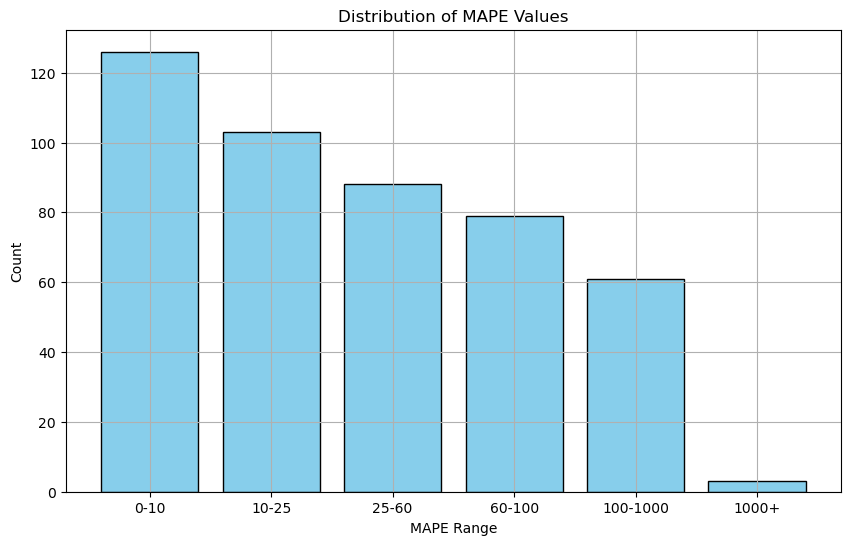

In [19]:
# Extract MAPE values from results list
mapes = [result[3] for result in results]

# Define ranges
ranges = [(0, 10), (10, 25), (25, 60), (60, 100), (100,1000), (1000, float('inf'))]

# Initialize count for each range
counts = [0] * len(ranges)

# Count the number of data points in each range
for mape in mapes:
    for i, (start, end) in enumerate(ranges):
        if start <= mape < end:
            counts[i] += 1
            break
    else:
        counts[-1] += 1  # For values above 100

# Define range labels
range_labels = ['0-10', '10-25', '25-60', '60-100', '100-1000', '1000+']

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(ranges)), counts, color='skyblue', edgecolor='black')
plt.xticks(range(len(ranges)), range_labels)
plt.title('Distribution of MAPE Values')
plt.xlabel('MAPE Range')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [20]:
results_df.to_excel('/Users/keremsmacbook/DataspellProjects/MultivariateForecasting/OutputData/S&P500_NBeats.xlsx', index=False)